# Regressione lineare multipla
In questo notebook eseguiremo una regressione lineare multipla utilizzando il Boston Housing Dataset.
Il Boston Housing Dataset contiene 506 esempi di abitazioni nella zona di Boston con le seguenti 14 features:

**CRIM** Tasso di criminalità per capita<br>
**ZN** Percentuale di terreni residenziali suddivisi in zone per lotti superiori a 25.000 sq.ft.<br>
**INDUS** Percentuale di ettari di attività non al dettaglio per città.<br>
**CHAS** Variabile dummy che indica la prossimità al fiume Charles.<br>
**NOX** Concentrazione di ossido d'azoto (parti per 10 milioni).<br>
**RM** Numero medio di stanze per abitazione<br>
**AGE** Percentuale di abitazione occupate costruite dopo il 1940<br>
**DIS** Media pesata delle distanze da 5 centri lavorativi di Boston.<br>
**RAD** Indice di accessibilità ad autostrade<br>
**TAX** Aliquota dell'imposta sulla proprietà a valore pieno in 10.000 USD.<br>
**PRATIO** Rapporto studente-insegnante per città.<br>
**BLACK** 1000(Bk - 0.63)^2 dove Bk è la percentuale di abitanti di colore per città<br>
**LSTAT** Percentuale della popolazione povera<br>
**MEDV** Mediana del valore di abitazioni occupate in 1.000 USD.<br>

Il nostro obiettivo è predirre il **MEDV** utilizzando 2 o più tra le altre features.
Cominciamo importando le librerie necessarie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Carichiamo il dataset dalla repository in un DataFrame

In [4]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=[
                     ])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Regressione lineare multipla su un subset delle features

Cominciamo esplorando il DataFrame alla ricerca di correlazioni tra le varie features e tra le features e l'attributo target MEDV.<br>
In questi casi è molto utile il metodo *corr* del DataFrame, che ritorna un indice della correlazione tra le varie colonne. L'indice è un valore in un range tra -1 ed 1 ed ha questo significato:
* **Valore tendente allo 0:** La correlazione tra le proprietà è nulla o scarsa.
* **Valore tendente ad 1:** Le proprità sono direttamente correlate (l'aumento della prima comporta l'aumento della seconda)
* **Valore tendente ad -1:** Le proprità sono inversamente correlate (l'aumento della prima comporta il decremento della seconda)

In [68]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Ecco i nostro indici di correlazione, ma tutti questi numeri creano molto confusione, esiste un modo migliore per visualizzare le correlazioni ? Certo, una heatmap.<br>
Una heatmap rappresenta le correlazioni tramite colori
Per creare la heatmap delle correlazioni possiamo utilizzare seaborn, una libreria python che si appoggia ad matplotlib per creare grafici e visualizzazioni eleganti con poche istruzioni

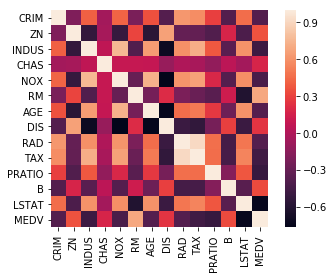

In [74]:
import seaborn as sns

#sns.set(font_scale=1.5)
hm = sns.heatmap(boston.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=boston.columns,
                 xticklabels=boston.columns)
plt.show()

Ecco la nostra heatmap, la barra verticale sulla destra indica lo spettro della correlazione, tendente al rosso vuol dire nessuna o scarsa correlazione (valore 0), tendente al nero vuol dire correlazione inversa (valore -1) e tendente al bianco vuol dire correlazione diretta (valore 1). Ovviamente la diagonale tende al bianco perchè rappresenta la correlazione tra una proprietà e se stessa. Le proprietà più direttamente correlate con MEDV sembrerebbero essere RM e ZN, mentre quelle più inversamente correlate LSTAT, PRATIO, TAX e INDUS.
Creiamo un'altra heatmap più piccola contenente solo queste proprietà e questa volta stampiamo anche il valore numerico della correlazione

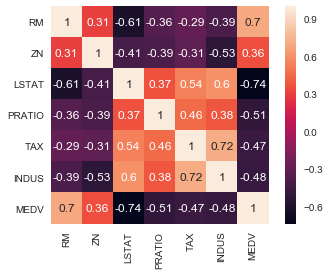

In [106]:
import seaborn as sns

cols=['RM',"ZN","LSTAT","PRATIO","TAX","INDUS","MEDV"]

hm = sns.heatmap(boston[cols].corr(),
                 cbar=True,
                 square=True,
                 yticklabels=boston[cols].columns,
                 xticklabels=boston[cols].columns,
                 annot=True,                          #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})               #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

Usiamo sempre seaborn per visualizzare le correlazioni su di un grafico.

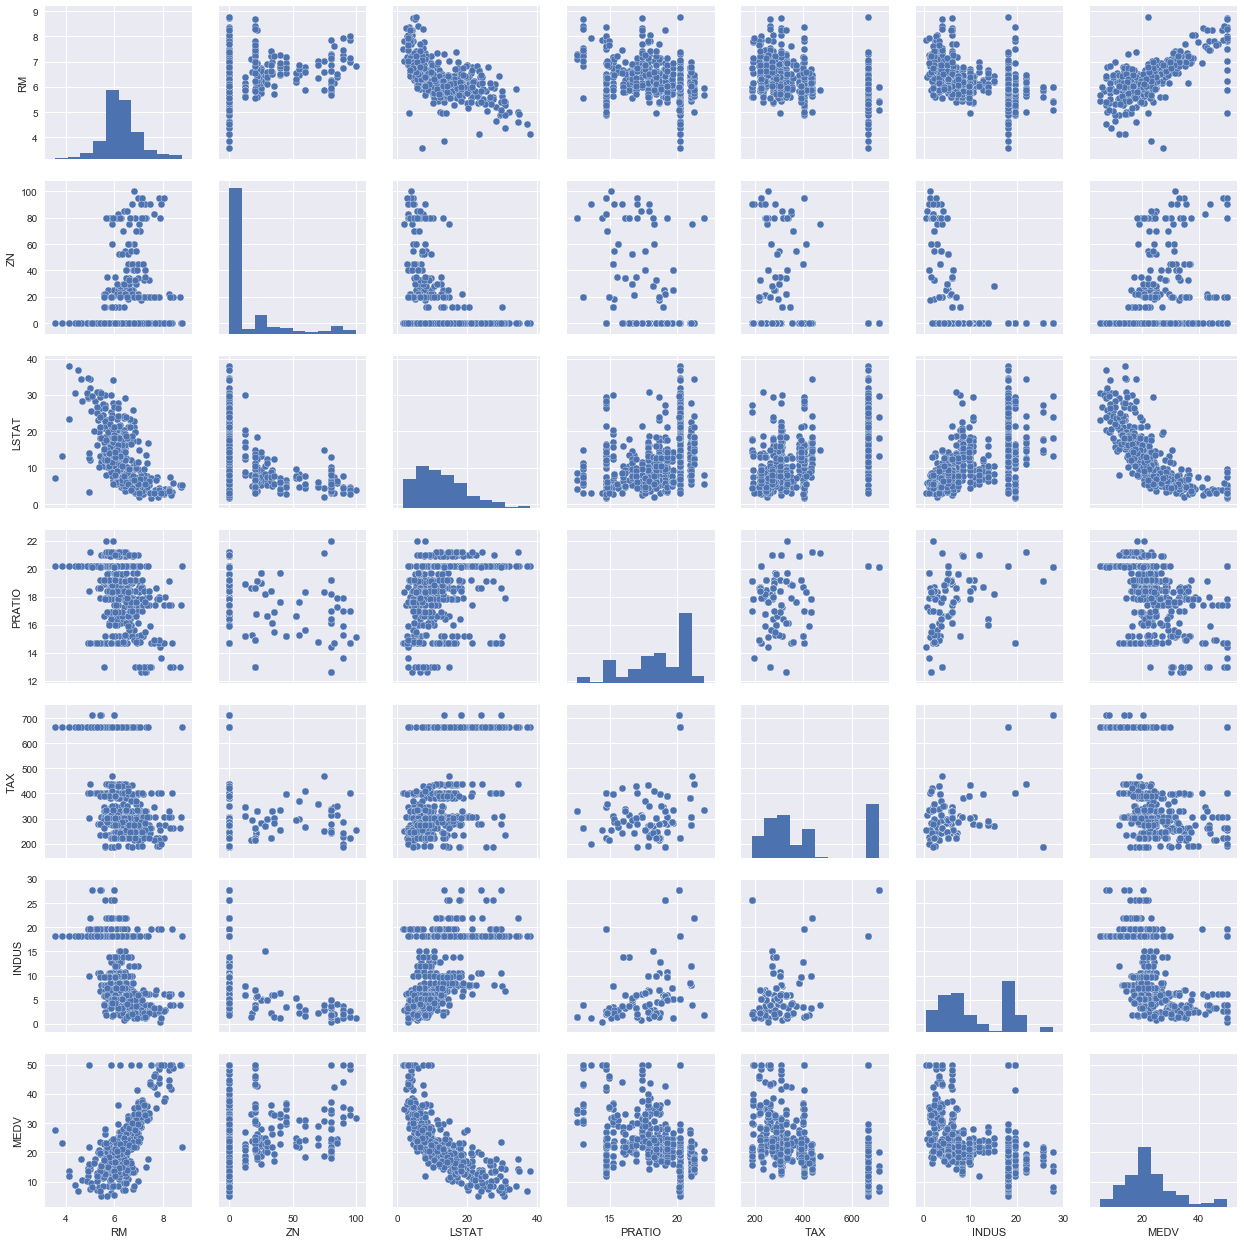

In [121]:
+

Come avevamo notato, la correlazione tra RM, LSTAT ed MEDV è piuttosto forte, bene, proviamo a costruire un modello di regressione lineare multipla utilizzando queste due features.

In [126]:
X = boston[["RM","LSTAT"]].values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 32.72507169281496
R2 score: 0.6069792285352371


Errore è punteggio ottenuti in questo modo sono migliori rispetto a quanto è possibile ottenere effettuando la regressione su una sola delle due proprietà.

## Regressione lineare multipla su tutte le features
Adesso eseguiamo una regressione lineare multipla su tutte le proprietà

In [130]:
from sklearn.preprocessing import StandardScaler

X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

Questa volta standardizziamo il dataset

In [131]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

Ed eseguiamo la regressione

In [132]:
ll = LinearRegression()
ll.fit(X_train_std, Y_train)
Y_pred = ll.predict(X_test_std)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 27.195965766883198
R2 score: 0.6733825506400196


Errore è punteggio ottenuti in questo modo sono decisamente migliori, vediamo a quali proprietà hanno più peso nella regressione guardando ai coefficenti.

In [136]:
weights = pd.DataFrame(data=list(zip(boston.columns, ll.coef_)), columns=['feature', 'weight'])
weights

,feature,weight
0,CRIM,-1.011901
1,ZN,1.050280
2,INDUS,0.079210
3,CHAS,0.618962
4,NOX,-1.873691
5,RM,2.705270
6,AGE,-0.279573
7,DIS,-3.097665
8,RAD,2.096900
9,TAX,-1.886063
